In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data.csv')
data=pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

In [ ]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#Preprocessing of the dataset

In [ ]:
drop_features = ["id"]
data = data.drop(drop_features, axis=1)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


from matplotlib import pyplot as plt
data['gender'].plot(kind='hist', bins=20, title='gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['hypertension'].plot(kind='hist', bins=20, title='hypertension')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['heart_disease'].plot(kind='hist', bins=20, title='heart_disease')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='gender', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='age', y='hypertension', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='hypertension', y='heart_disease', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='heart_disease', y='ever_married', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['gender'].plot(kind='line', figsize=(8, 4), title='gender')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['hypertension'].plot(kind='line', figsize=(8, 4), title='hypertension')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['heart_disease'].plot(kind='line', figsize=(8, 4), title='heart_disease')
plt.gca().spines[['top', 'right']].set_visible(False)

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
data.shape

(5110, 11)

In [ ]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#As we can observe in the above cell, bmi column have 201 missing values, thus to fill this missing values, we using knnImputer

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 71)
data['bmi'] = imputer.fit_transform(data[['bmi']])

In [ ]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
data['stroke'].value_counts()[0]

4861

In [ ]:
data['stroke'].value_counts()[1]

249

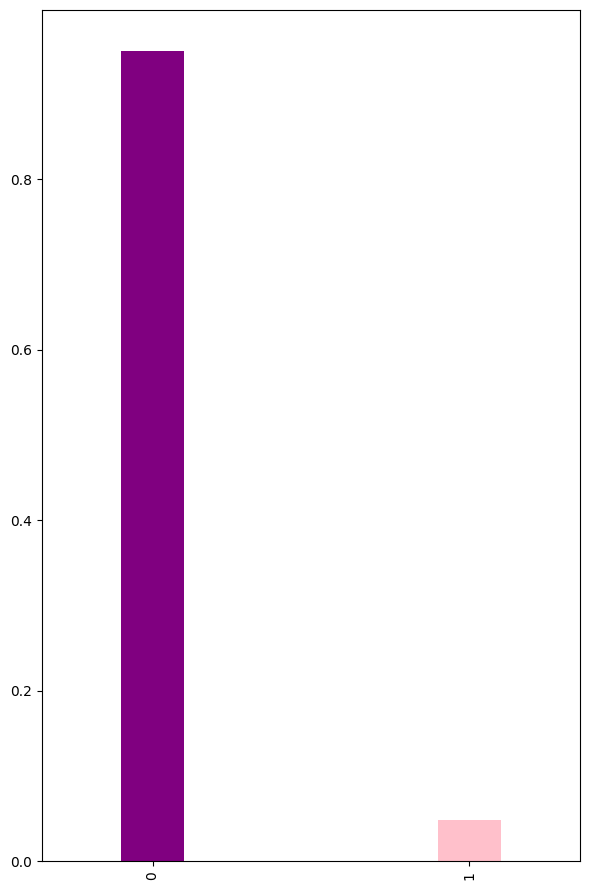

In [ ]:
fig, axes = plt.subplots(figsize=(6, 9))
data['stroke'].value_counts(normalize=True).plot.bar(width=0.2, color=('purple','pink'))

plt.tight_layout()
plt.show()

In [ ]:
df=data

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
df.shape

(5110, 11)

##Encoding

In [ ]:
#encoding

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['gender']= label_encoder.fit_transform(df['gender'])
df['ever_married']= label_encoder.fit_transform(df['ever_married'])
df['work_type']= label_encoder.fit_transform(df['work_type'])
df['Residence_type']= label_encoder.fit_transform(df['Residence_type'])
df['smoking_status']= label_encoder.fit_transform(df['smoking_status'])

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


##Spillting the dataset into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:-1].values
Y = df.iloc[:, -1].values

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=.3, random_state=15)

In [ ]:
Y

array([1, 1, 1, ..., 0, 0, 0])

#Visualization

In [ ]:
#visualizing the dataset

<ipython-input-24-311303d7c6c2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['stroke'] == 0]['age'], color='green')
<ipython-input-24-311303d7c6c2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['stroke'] == 1]['age'], color='red')


Text(0.5, 1.0, 'Age: Stroke vs. No Stroke')

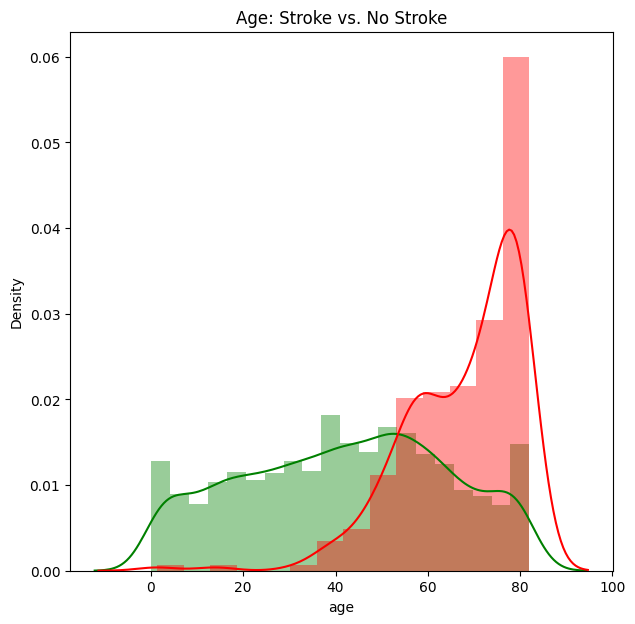

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(data[data['stroke'] == 0]['age'], color='green')
sns.distplot(data[data['stroke'] == 1]['age'], color='red')
plt.title('Age: Stroke vs. No Stroke')

In [ ]:
data['smoking_status'].unique()

array([1, 2, 3, 0])

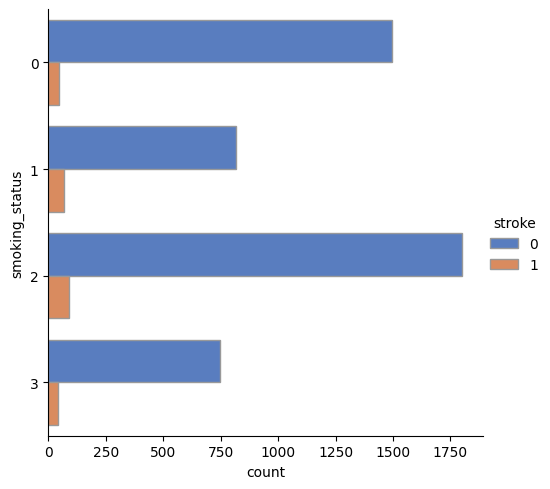

In [ ]:
# Smoking to Stroke
sns.catplot(y="smoking_status", hue="stroke", kind="count",palette="muted", edgecolor="0.6", data=data)
plt.show()

In [ ]:
data['gender'].unique()

array([1, 0, 2])

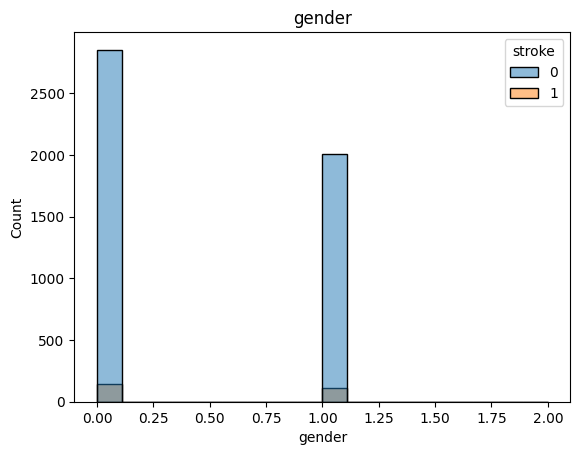

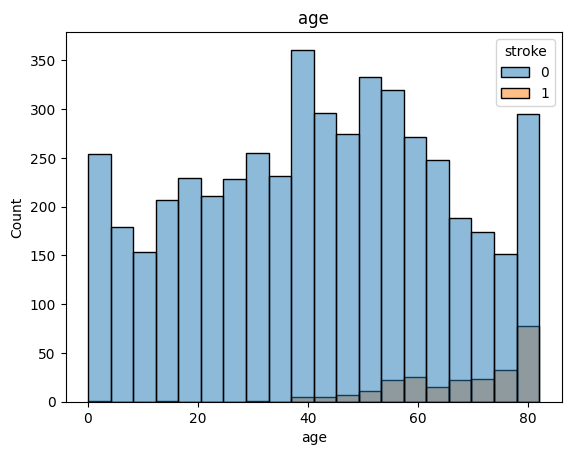

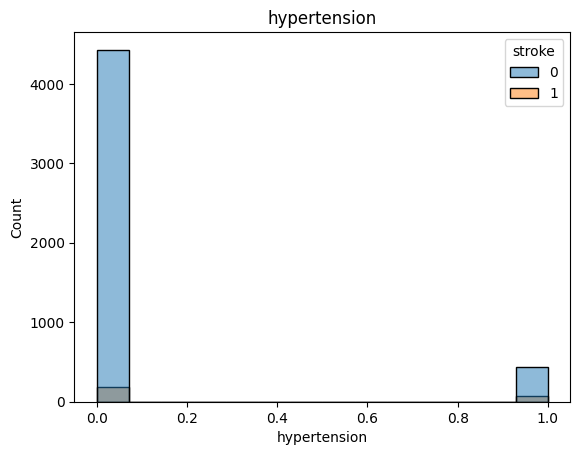

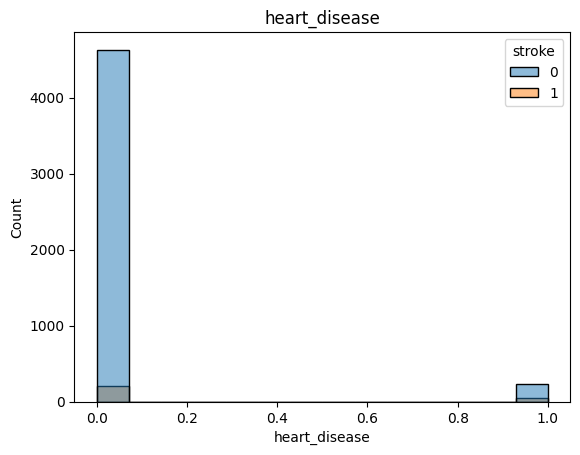

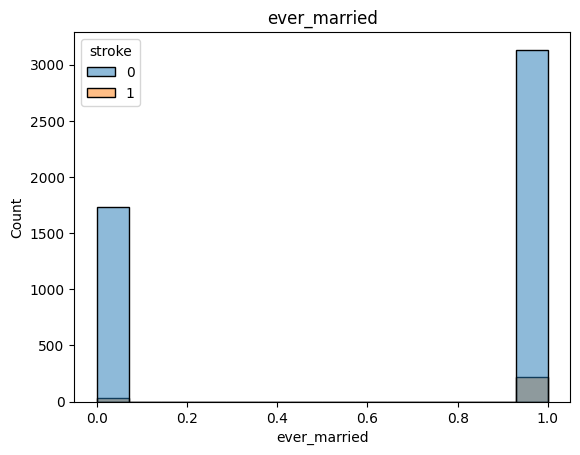

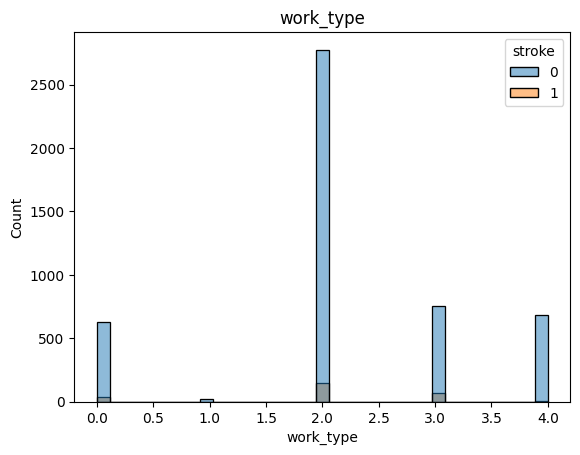

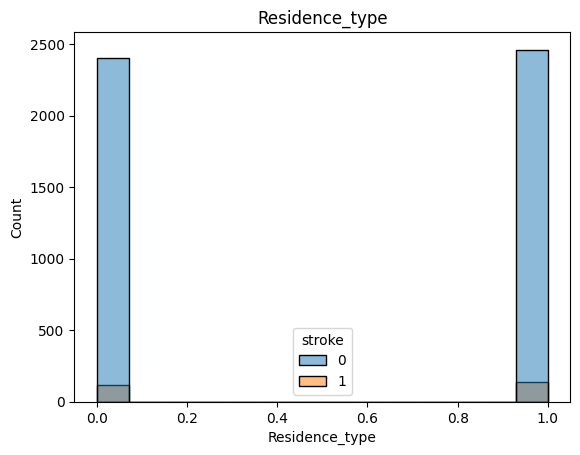

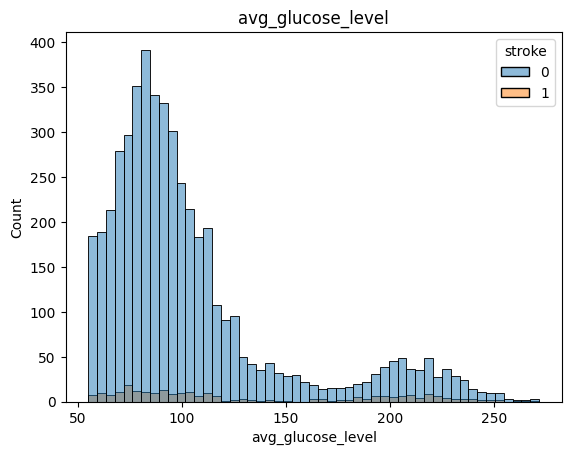

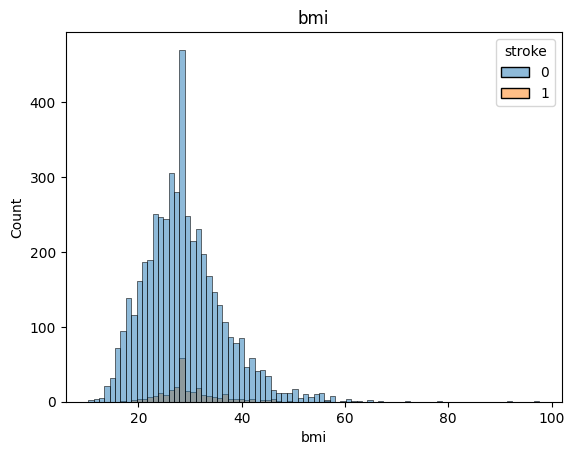

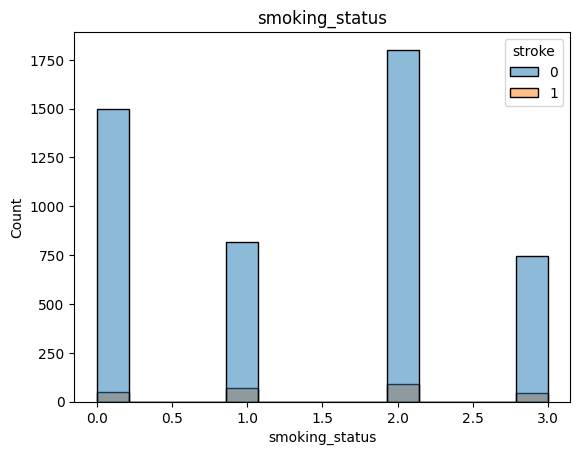

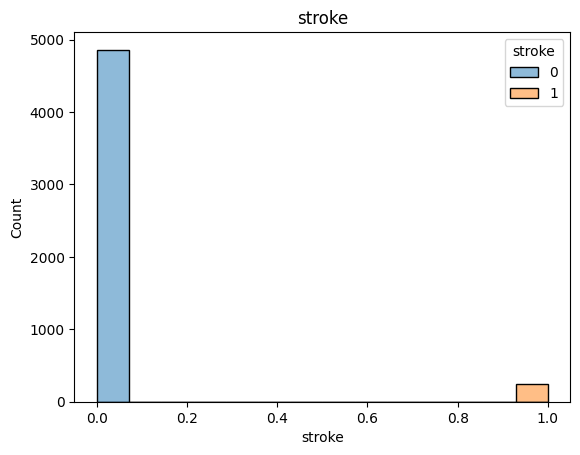

In [ ]:
for feature in df.columns:
    plt.title(feature)
    sns.histplot(data = df , x = feature , hue = 'stroke')
    plt.show()

#As target column have classes imbalanced, thus in order to balance then we are using here smote

In [ ]:
#using smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train1, Y_train1 = sm.fit_resample(X, Y.ravel())

#Training and testing the various models

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
LGR = LogisticRegression(random_state=0)
LGR.fit(X_train1, Y_train1.ravel())
pred_LGR=LGR.predict(X_train1)
print('training acuracy for LogisticRegression model =',accuracy_score(Y_train1,pred_LGR))
print()
LGR1 = LogisticRegression(random_state=0)
LGR1.fit(X_train1, Y_train1.ravel())
pred_LGR1=LGR1.predict(X_test)
print('testing acuracy for LogisticRegression model =',accuracy_score(Y_test,pred_LGR1))

training acuracy for LogisticRegression model = 0.7674346842213536

testing acuracy for LogisticRegression model = 0.7429876060013046


In [ ]:
dtc = DecisionTreeClassifier(max_depth=22)
dtc.fit(X_train1,Y_train1)
pred11=dtc.predict(X_train1)
print(' training acuracy for DecisionTreeClassifier model',accuracy_score(Y_train1,pred11))
print()
dtc1 = DecisionTreeClassifier(max_depth=22)
dtc1.fit(X_train1,Y_train1.ravel())
pred112=dtc1.predict(X_test)
print(' testing acuracy for DecisionTreeClassifier model =',accuracy_score(Y_test,pred112))

 training acuracy for DecisionTreeClassifier model 0.9997942810121374

 testing acuracy for DecisionTreeClassifier model = 0.9986953685583823


In [ ]:
lgbm = LGBMClassifier(n_estimators=1000, eta=0.5,max_depth=2)
lgbm.fit(X_train1,Y_train1.ravel())
pred4=lgbm.predict(X_train1)
print(' training acuracy for lightgbm model =',accuracy_score(Y_train1,pred4))
print()
lgbm1 = LGBMClassifier(n_estimators=1000, eta=0.5,max_depth=2)
lgbm1.fit(X_train1,Y_train1.ravel())
pred2=lgbm1.predict(X_test)
print(' testing acuracy for lightgbm model =',accuracy_score(Y_test,pred2))

[LightGBM] [Warning] learning_rate is set=0.1, eta=0.5 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.5 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Info] Number of positive: 4861, number of negative: 4861
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 9722, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [ ]:
rfc = RandomForestClassifier(n_estimators=700,max_depth=10)
rfc.fit(X_train1,Y_train1.ravel())
pred4=rfc.predict(X_train1)
print(' training acuracy for RandomForestClassifier =',accuracy_score(Y_train1,pred4))
print()
rfc1 = RandomForestClassifier(n_estimators=700,max_depth=10)
rfc1.fit(X_train1,Y_train1.ravel())
pred4=rfc1.predict(X_test)
print(' testing acuracy for RandomForestClassifier =',accuracy_score(Y_test,pred4))

 training acuracy for RandomForestClassifier = 0.9764451758897347

 testing acuracy for RandomForestClassifier = 0.9686888454011742


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train1,Y_train1.ravel())
pred5=knn.predict(X_train1)
print(' testing acuracy for KNeighborsClassifier =',accuracy_score(Y_train1,pred5))
print()
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train1,Y_train1.ravel())
pred05=knn1.predict(X_test)
print(' testing acuracy for KNeighborsClassifier =',accuracy_score(Y_test,pred05))

 testing acuracy for KNeighborsClassifier = 0.9415758074470274

 testing acuracy for KNeighborsClassifier = 0.8988910632746249


In [ ]:
Svc = svm.SVC()
Svc.fit(X_train1,Y_train1.ravel())
pred3=Svc.predict(X_train1)
print('acuracy for SVM =',accuracy_score(Y_train1,pred3))
print()
Svc1 = svm.SVC()
Svc1.fit(X_train1,Y_train1.ravel())
pred03=Svc1.predict(X_test)
print('acuracy for SVM =',accuracy_score(Y_test,pred03))

acuracy for SVM = 0.7673318247274223

acuracy for SVM = 0.7058056099151989


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=5000)
mlp.fit(X_train1,Y_train1.ravel())
pred55=mlp.predict(X_train1)
print(' training acuracy for MLP =',accuracy_score(Y_train1,pred55))
print()
mlp1 = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=5000)
mlp1.fit(X_train1,Y_train1.ravel())
pred66=mlp1.predict(X_test)
print(' testing acuracy for MLP =',accuracy_score(Y_test,pred66))

 training acuracy for MLP = 0.816190084344785

 testing acuracy for MLP = 0.7971298108284409


In [ ]:
gdb = GradientBoostingClassifier(n_estimators=700,max_depth=10)
gdb.fit(X_train1,Y_train1.ravel())
pred77=gdb.predict(X_train1)
print(' training acuracy for Gradient Boosting =',accuracy_score(Y_train1,pred77))
print()
gdb1 = GradientBoostingClassifier(n_estimators=2000, learning_rate=0.1,max_depth=1, random_state=0)
gdb1.fit(X_train1,Y_train1.ravel())
pred88=gdb1.predict(X_test)
print(' testing acuracy for Gradient Boosting =',accuracy_score(Y_test,pred88))

 training acuracy for Gradient Boosting = 1.0

 testing acuracy for Gradient Boosting = 0.9517286366601435


In [ ]:
# observing training and testing accuracies of various above models we can say that there is no overfit condition.

#Plotting ROC curve to compare the models

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
probs_LGR = LGR1.fit(X_train1, Y_train1.ravel()).predict_proba(X_test)[:, 1]
auc_LGR = roc_auc_score(Y_test, probs_LGR)
fpr_LGR, tpr_LGR, thresholds_LGR = roc_curve(Y_test, probs_LGR)

probs_dtc = dtc1.fit(X_train1, Y_train1.ravel()).predict_proba(X_test)[:, 1]
auc_dtc = roc_auc_score(Y_test, probs_dtc)
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(Y_test, probs_dtc)

probs_lgbm = lgbm1.fit(X_train1, Y_train1.ravel()).predict_proba(X_test)[:, 1]
auc_lgbm = roc_auc_score(Y_test, probs_lgbm)
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(Y_test, probs_lgbm)

probs_rfc = rfc1.fit(X_train1, Y_train1.ravel()).predict_proba(X_test)[:, 1]
auc_rfc = roc_auc_score(Y_test, probs_rfc)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(Y_test, probs_rfc)

probs_knn = knn1.fit(X_train1, Y_train1.ravel()).predict_proba(X_test)[:, 1]
auc_knn = roc_auc_score(Y_test, probs_knn)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_test, probs_knn)

probs_mlp = mlp1.fit(X_train1, Y_train1.ravel()).predict_proba(X_test)[:, 1]
auc_mlp = roc_auc_score(Y_test, probs_mlp)
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(Y_test, probs_mlp)

probs_gdb = gdb1.fit(X_train1, Y_train1.ravel()).predict_proba(X_test)[:, 1]
auc_gdb = roc_auc_score(Y_test, probs_gdb)
fpr_gdb, tpr_gdb, thresholds_gdb = roc_curve(Y_test, probs_gdb)



[LightGBM] [Warning] learning_rate is set=0.1, eta=0.5 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.5 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Info] Number of positive: 4861, number of negative: 4861
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 9722, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

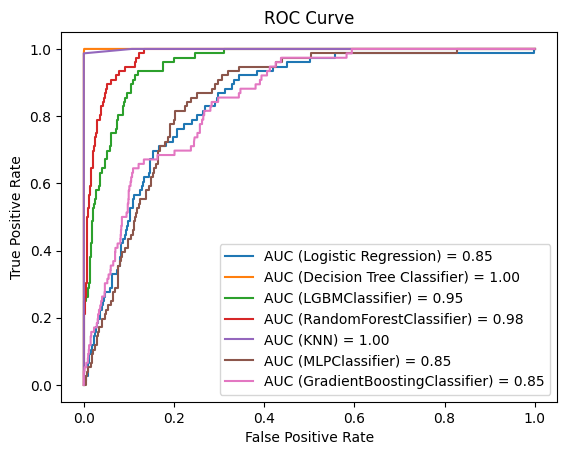

In [ ]:
plt.plot(fpr_LGR, tpr_LGR, label=f'AUC (Logistic Regression) = {auc_LGR:.2f}')
plt.plot(fpr_dtc, tpr_dtc, label=f'AUC (Decision Tree Classifier) = {auc_dtc:.2f}')
plt.plot(fpr_lgbm, tpr_lgbm, label=f'AUC (LGBMClassifier) = {auc_lgbm:.2f}')
plt.plot(fpr_rfc, tpr_rfc, label=f'AUC (RandomForestClassifier) = {auc_rfc:.2f}')
plt.plot(fpr_knn, tpr_knn, label=f'AUC (KNN) = {auc_knn:.2f}')
plt.plot(fpr_mlp, tpr_mlp, label=f'AUC (MLPClassifier) = {auc_mlp:.2f}')
plt.plot(fpr_gdb, tpr_gdb, label=f'AUC (GradientBoostingClassifier) = {auc_gdb:.2f}')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend();

**AS A RESULT THE TESTING ACCURACY IS BEST FOR DECISION TREE:** **CLASSIFIER**